<a href="https://colab.research.google.com/github/Aleena-Mishra-10/Predicting_lungs_Disease/blob/master/Predicting_Lungs_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [0]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:19<00:00, 81.3MB/s]
100% 2.29G/2.29G [00:19<00:00, 124MB/s] 


In [4]:
from zipfile  import ZipFile
file_name="chest-xray-pneumonia.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import skimage
from skimage.transform import resize

In [0]:
image_size=[224,224]

train_path="/content/chest_xray/train"
test_path="/content/chest_xray/test"

In [0]:
os.listdir(train_path)
train_n = train_path+'/NORMAL/'
train_p = train_path+'/PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-0540-0001.jpeg
pneumonia picture title: person1451_virus_2482.jpeg


Text(0.5, 1.0, 'Pneumonia')

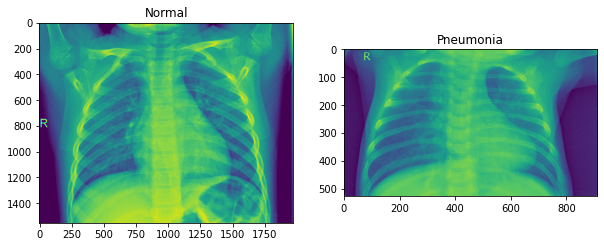

In [34]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [0]:
vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
for layer in vgg.layers:
    layer.trainable=False

In [0]:
#folders=glob('/content/chest_xray/train/*')

In [0]:
folders

['/content/chest_xray/train/NORMAL', '/content/chest_xray/train/PNEUMONIA']

In [0]:
x=Flatten()(vgg.output)

In [0]:
prediction=Dense(2,activation='softmax')(x)

In [0]:
#create  a model object
model=Model(inputs=vgg.inputs , outputs=prediction)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
training_set=train_datagen.flow_from_directory(
    "/content/chest_xray/train",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical' 
)

Found 5216 images belonging to 2 classes.


In [0]:
test_set=test_datagen.flow_from_directory(
    "/content/chest_xray/test",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical' 
)

Found 624 images belonging to 2 classes.


In [0]:
print(len(training_set))
print(len(test_set))

163
20


In [0]:
his=model.fit_generator(
        training_set,
        steps_per_epoch=163,
        epochs=5,
        validation_data=test_set,
        validation_steps=20    
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
145/163 [=========================>....] - ETA: 4:59 - loss: 0.2383 - accuracy: 0.9080

KeyboardInterrupt: ignored

In [0]:

# plot the loss
plt.plot(his.history['loss'], label='train loss')
plt.plot(his.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(his.history['acc'], label='train acc')
plt.plot(his.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

Using TensorFlow backend.
